### Importing & analyzing the dataset

In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [4]:
stars_data = pd.read_csv('6 class csv.csv')

### Analyzing the dataset

In [5]:
stars_data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.00,240.00,240.00,240.00,240.00
mean,10497.46,107188.36,237.16,4.38,2.50
std,9552.43,179432.24,517.16,10.53,1.71
min,1939.00,0.00,0.01,-11.92,0.00
25%,3344.25,0.00,0.10,-6.23,1.00
50%,5776.00,0.07,0.76,8.31,2.50
75%,15055.50,198050.00,42.75,13.70,4.00
max,40000.00,849420.00,1948.50,20.06,5.00


In [6]:
stars_data.dtypes

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object

In [7]:
null, nan = stars_data.isnull().sum() , stars_data.isna().sum()
print(null)
print(nan)

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64
Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


In [8]:
stars_data.describe().T.style.bar(subset=['mean'],color='#606ff2').background_gradient(subset=['std'], cmap='turbo').background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Temperature (K),240.00,10497.46,9552.43,1939.00,3344.25,5776.00,15055.50,40000.00
Luminosity(L/Lo),240.00,107188.36,179432.24,0.00,0.00,0.07,198050.00,849420.00
Radius(R/Ro),240.00,237.16,517.16,0.01,0.10,0.76,42.75,1948.50
Absolute magnitude(Mv),240.00,4.38,10.53,-11.92,-6.23,8.31,13.70,20.06
Star type,240.00,2.50,1.71,0.00,1.00,2.50,4.00,5.00


In [16]:
data = stars_data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star color', 'Spectral Class']].to_numpy()
target = stars_data["Star type"].to_numpy()

In [17]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [18]:
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [19]:
print(sub_input.shape, val_input.shape)

(153, 6) (39, 6)


In [20]:
stars_data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [21]:
stars_data["Star color"].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

In [22]:
color_map = {
    'Blue ': 'Blue',
    'Blue white': 'Blue White',
    'Blue-white': 'Blue White',
    'Blue white ': 'Blue White',
    'Blue-White': 'Blue White',
    'white': 'White',
    'yellow-white': 'Yellowish White',
    'White-Yellow': 'Yellowish White',
    'yellowish': 'Yellowish'
}
stars_data["Star color"] = stars_data["Star color"].replace(color_map)
print(stars_data["Star color"].value_counts())

Red                   112
Blue                   56
Blue White             41
Yellowish White        12
White                  10
Yellowish               3
Whitish                 2
Orange                  2
Pale yellow orange      1
Orange-Red              1
Name: Star color, dtype: int64


In [23]:
stars_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.00,0.17,16.12,0,Red,M
1,3042,0.00,0.15,16.60,0,Red,M
2,2600,0.00,0.10,18.70,0,Red,M
3,2800,0.00,0.16,16.65,0,Red,M
4,1939,0.00,0.10,20.06,0,Red,M


In [24]:
stars_data.shape

(240, 7)

In [25]:
preprocessed_data = stars_data

In [26]:
stars_data.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [27]:
scaler = StandardScaler()
scaler.fit(preprocessed_data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)','Absolute magnitude(Mv)']])
preprocessed_data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)','Absolute magnitude(Mv)']] = scaler.transform(preprocessed_data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)','Absolute magnitude(Mv)']])

In [29]:
ohe = OneHotEncoder(sparse=False)
binary = ohe.fit_transform(np.array(preprocessed_data['Star color']).reshape(-1,1))

In [30]:
le = LabelEncoder()
le.fit(preprocessed_data['Spectral Class'])
preprocessed_data['Spectral Class'] = le.transform(preprocessed_data['Spectral Class'])

In [34]:
target_2 = preprocessed_data['Spectral Class']

In [35]:
get_values = preprocessed_data.drop(columns=['Star color','Spectral Class']).values

In [36]:
frames = [pd.DataFrame(get_values),pd.DataFrame(binary)]
df_pp = pd.concat(frames, axis=1)
df_pp.columns = list(range(len(df_pp.columns)))
df_pp['target_2'] = target
df_pp.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target_2
0,-0.78,-0.60,-0.46,1.12,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,5
1,-0.78,-0.60,-0.46,1.16,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,5
2,-0.83,-0.60,-0.46,1.36,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,5
3,-0.81,-0.60,-0.46,1.17,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,5
4,-0.90,-0.60,-0.46,1.49,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,5


In [37]:
X = df_pp.drop(columns='target_2')
y = df_pp['target_2']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [39]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None, predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models[:10]

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 10.07it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.96,0.84,None,0.95,0.34
ExtraTreesClassifier,0.96,0.84,None,0.95,0.26
BernoulliNB,0.94,0.83,None,0.93,0.07
LabelPropagation,0.93,0.81,None,0.92,0.04
LabelSpreading,0.93,0.81,None,0.92,0.04
ExtraTreeClassifier,0.90,0.81,None,0.89,0.02
PassiveAggressiveClassifier,0.92,0.80,None,0.92,0.04
SGDClassifier,0.92,0.78,None,0.91,0.04
GaussianNB,0.89,0.76,None,0.89,0.03


In [40]:
yhat = predictions['ExtraTreeClassifier']

In [41]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.82      1.00      0.90        18
           2       0.86      1.00      0.92         6
           4       0.50      0.67      0.57         3
           5       0.93      0.96      0.95        45
           6       1.00      0.82      0.90        17

    accuracy                           0.90        96
   macro avg       0.85      0.81      0.81        96
weighted avg       0.91      0.90      0.89        96



### Support Vector Classification

In [42]:
kernels = ['rbf', 'poly', 'sigmoid','linear']
best_score_SVC = 0
kernel_best = ''
for i in kernels:
    SupVec = SVC(kernel=i, gamma='auto', random_state=1)
    SupVec.fit(X_train,y_train)
    Y_pred_SV = SupVec.predict(X_test)
    if SupVec.score(X_test, y_test) > best_score_SVC:
        best_score_SVC = SupVec.score(X_test, y_test)
        kernel_best = i
    
print('The SVC performs better using a {} kernel, obtaining a {}% of accuracy'.format(kernel_best, best_score_SVC*100))
print("The (test) accuracy is approximately {}%".format(round(SupVec.score(X_test,y_test)*100)))

The SVC performs better using a linear kernel, obtaining a 91.66666666666666% of accuracy
The (test) accuracy is approximately 92%


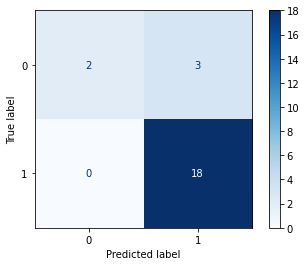

In [43]:
matrix_SV = confusion_matrix(y_test, Y_pred_SV, labels=[0,1])
plot_confusion_matrix(SupVec, X_test, y_test,labels=[0,1],cmap='Blues')

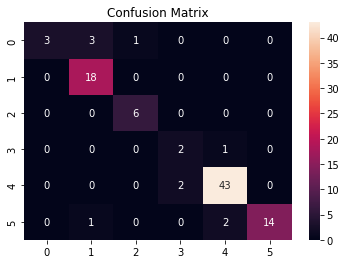

In [44]:
sns.heatmap(confusion_matrix(y_test,yhat),annot=True)
plt.title('Confusion Matrix')
plt.show()